In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Accenture.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.shape

(4497, 6)

In [4]:
training_set.shape

(4497, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.01625101],
       [0.0160314 ],
       [0.01581178],
       ...,
       [0.96944943],
       [0.96601031],
       [0.97833365]])

In [7]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(4437, 60)

In [9]:
y_train.shape

(4437,)

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [11]:
X_train.shape

(4437, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(X_train, y_train, epochs = 3, batch_size = 32)

Epoch 1/3
139/139 [==============================] - 28s 127ms/step - loss: 0.0071
Epoch 2/3
139/139 [==============================] - 18s 131ms/step - loss: 0.0017
Epoch 3/3
139/139 [==============================] - 18s 126ms/step - loss: 0.0013


In [21]:
dataset_test = pd.read_csv('Atest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 645):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

19/19 [==============================] - 3s 39ms/step


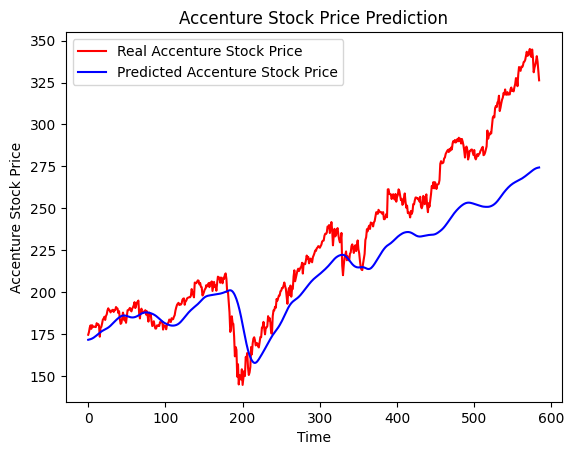

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Accenture Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Accenture Stock Price')
plt.title('Accenture Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Accenture Stock Price')
#plt.ylim((200,400))
plt.legend()
plt.show()